# Probability and Movies
### Looking at data from IMDB

#### Selena Flannery -- November 15, 2016

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


filename = 'data/movie_metadata.csv'

m = pd.read_csv(filename)
m.movie_title = m.movie_title.str.strip()
m.duration = pd.to_numeric(m.duration)
m.budget = pd.to_numeric(m.budget)
m.gross = pd.to_numeric(m.gross)
m.imdb_score = pd.to_numeric(m.imdb_score)
m.set_index("movie_title", inplace=True)
m.drop(["color", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_name", "actor_1_facebook_likes", "actor_1_name"], axis=1, inplace=True)
m.drop(["cast_total_facebook_likes", "movie_imdb_link", "language", "actor_2_facebook_likes", "aspect_ratio"], axis=1, inplace=True)
m.drop(["actor_3_name", "facenumber_in_poster", "plot_keywords", "country"], axis=1, inplace=True)

In [25]:
m.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'num_voted_users', 'num_user_for_reviews', 'content_rating',
       'budget', 'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## What is the probability that...

### A movie was longer than an hour and a half?

In [4]:
ninety_min_num_movies = len(m.duration[m.duration > 90.0])
total_num_movies = len(m.index[m.duration != np.nan])
ninety_min_num_movies/total_num_movies

0.8080507634344636

### A movie was longer than two hours?

In [5]:
two_hour_movies = len(m.duration[m.duration > 120.0])
two_hour_movies/total_num_movies

0.2115804084870117

### A movie was directed by Steven Spielberg?

In [6]:
num_movies_directed = len(m.director_name[m.director_name != np.nan])
spiel = len(m.director_name[m.director_name == "Steven Spielberg"])
spiel/num_movies_directed

0.005155661312710688

### A movie directed by Clint Eastwood will gross under budget?

In [7]:
e_movies = m[m.director_name == "Clint Eastwood"]
e_gross_under_budget = len(e_movies[(e_movies.gross != np.nan) & (e_movies.budget != np.nan) & (e_movies.gross < e_movies.budget)])
e_gross_under_budget/len(e_movies.index)

0.35

### A movie generally grossed more than its budget?

In [8]:
movies_with_budget_and_gross = m[(~pd.isnull(m.gross)) & (~pd.isnull(m.budget))]
gross_over_budget = m[(m.gross > m.budget) & (~pd.isnull(m.gross)) & (~pd.isnull(m.budget))]

len(gross_over_budget)/len(movies_with_budget_and_gross)


0.5268568491390389

### A movie grossed over the average gross of this data set?

In [9]:
average_gross = m.gross.mean()
movie_grossed_over_average = len(m.index[(~pd.isnull(m.gross)) & (m.gross > average_gross)])
total_movie_with_gross = len(m.index[~pd.isnull(m.gross)])
movie_grossed_over_average/total_movie_with_gross

0.31882664101947583

## False Positives

###  A movie that was highly-rated but did poorly in the box office (gross < budget)

In [18]:
movies_with_scores = m[(~pd.isnull(m.imdb_score) & (~pd.isnull(m.gross)) & (~pd.isnull(m.budget)))][["imdb_score", "gross", "budget"]]
positive_scores = movies_with_scores[movies_with_scores.imdb_score > 6]
false_positives = positive_scores[positive_scores.gross < positive_scores.budget]
len(false_positives)/len(positive_scores)

0.43015521064301554

## False Negatives

### A movie that was poorly rated, but did well in the box office (gross > budget)

In [22]:
negative_scores = movies_with_scores[movies_with_scores.imdb_score <= 6]
false_negatives = negative_scores[negative_scores.gross > negative_scores.budget]

len(false_negatives)/len(negative_scores)

0.42953586497890295

### Tom Hanks vs Harrison Ford: Gross > budget

### Tom Hanks vs Harrison Ford: Ratings

# Visualizations

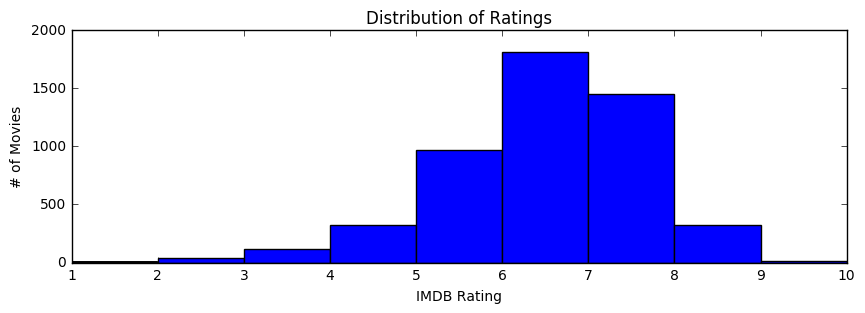

In [58]:
scores = m.imdb_score

plt.figure(figsize=(10, 3))
plt.hist(scores, bins=np.arange(1, 11))
plt.title("Distribution of Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("# of Movies")
plt.show()

According to this graph, it appears that the distribution is skewed to the right, most films are rate at a 6 or a seven

In [49]:
scores.describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

In [64]:
mean = scores.mean()
median = scores.quantile(.5)
std = scores.std()
print("Mean: {}\nMedian: {}\nStandard Deviation: {}".format(mean, median, std) )
print("The mean is {} standard deviations below the median".format((median - mean)/std))

Mean: 6.442137616498116
Median: 6.6
Standard Deviation: 1.125115865732819
The mean is 0.14030766813430648 standard deviations below the median


## What’s the probability that a movie’s length will be between 1:10 and 1:30?